In [1]:
import pandas as pd
import os


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)

In [2]:
os.getcwd()

'c:\\Users\\sylva\\Desktop\\nflpredictor\\nfl\\03_modelisation\\modelisation_final_dataset'

In [2]:
df = pd.read_csv("../../04_datasets/nfl_dataset_vf.csv", index_col=0)
df.head()

,season,week,awayteam,hometeam,idgame,winner_home,home_coach,away_coach,weather_type,temperature,...,punt_return_yds_MA_5_home,kicking_pts_MA_5_home,delta_day_away,delta_day_home,stade,location,people,month,dayofmonth,dayofweek
0,2017,13,Vikings,Falcons,400951677,0,Dan Quinn,Mike Zimmer,NaN,NaN,...,10.4,9.4,10.0,7.0,Mercedes-Benz Stadium,"Atlanta, GA",95.0,12,3,6
1,2017,9,Falcons,Panthers,400951749,1,Ron Rivera,Dan Quinn,cloudy,61.0,...,22.4,7.4,7.0,7.0,Bank of America Stadium,"Charlotte, NC",100.0,11,5,6
2,2017,9,Bengals,Jaguars,400951753,1,Doug Marrone,Marvin Lewis,NaN,78.0,...,0.4,8.4,7.0,14.0,TIAA Bank Field,"Jacksonville, FL",89.0,11,5,6
3,2017,4,Bears,Packers,400951678,1,Mike McCarthy,John Fox,cloudy,65.0,...,NaN,NaN,4.0,4.0,Lambeau Field,"Green Bay, WI",97.0,9,29,4
4,2017,9,Colts,Texans,400951751,0,Bill O'Brien,Chuck Pagano,cloudy,84.0,...,31.4,9.0,7.0,6.0,NRG Stadium,"Houston, TX",100.0,11,5,6


In [4]:
corr = df.corr()

<AxesSubplot:>

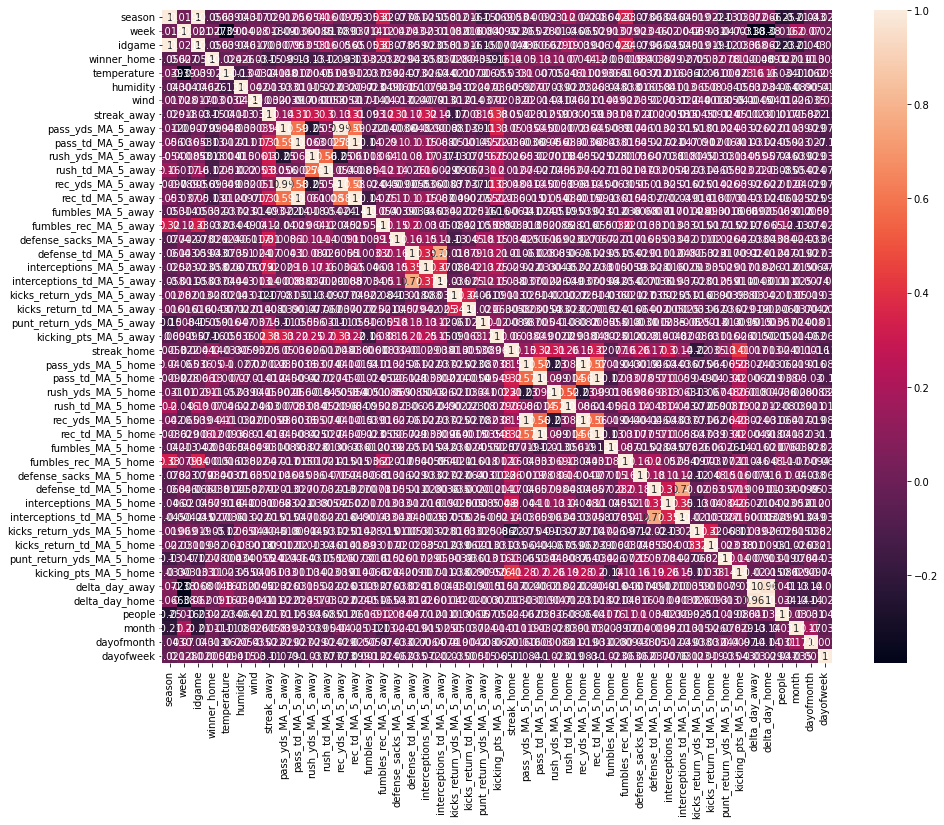

In [8]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True, ax=ax)

In [12]:
select_features = [ 'awayteam', 'hometeam', 'winner_home', 'humidity', 'streak_away',
                    'pass_yds_MA_5_away', 'pass_td_MA_5_away', 'rush_yds_MA_5_away','rush_td_MA_5_away', 'rec_yds_MA_5_away',
                    'rec_td_MA_5_away', 'kicks_return_yds_MA_5_away', 'punt_return_yds_MA_5_away', 'kicking_pts_MA_5_away',
                    'streak_home', 
                    'pass_yds_MA_5_home', 'pass_td_MA_5_home', 'rush_yds_MA_5_home', 'rush_td_MA_5_home', 'rec_yds_MA_5_home',
                    'rec_td_MA_5_home', 'kicks_return_yds_MA_5_home', 'punt_return_yds_MA_5_home', 'kicking_pts_MA_5_home',
                    'people']

In [13]:
corr = df.loc[:,select_features].corr()

<AxesSubplot:>

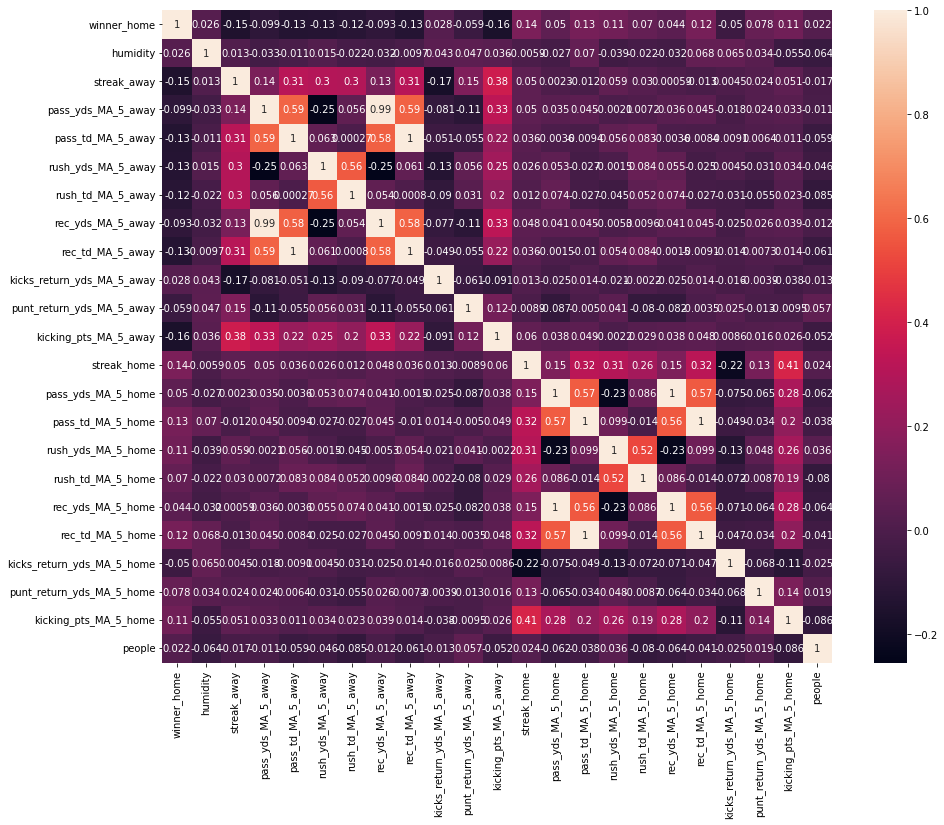

In [14]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True, ax=ax)

In [20]:
import statsmodels

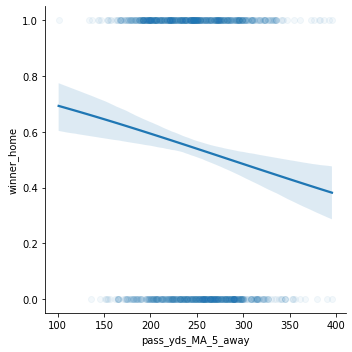

In [21]:
sns.lmplot(x = 'pass_yds_MA_5_away', y = 'winner_home', data = df, logistic = True, scatter_kws={"alpha":.05})

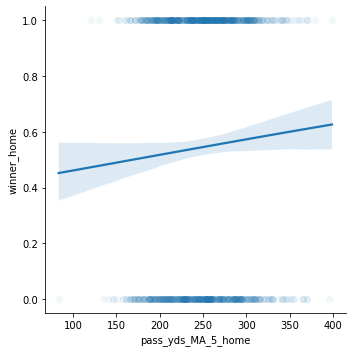

In [22]:
sns.lmplot(x = 'pass_yds_MA_5_home', y = 'winner_home', data = df, logistic = True, scatter_kws={"alpha":.05})

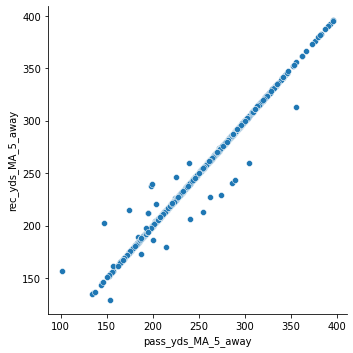

In [23]:
sns.relplot(x = 'pass_yds_MA_5_away', y = 'rec_yds_MA_5_away', data = df)

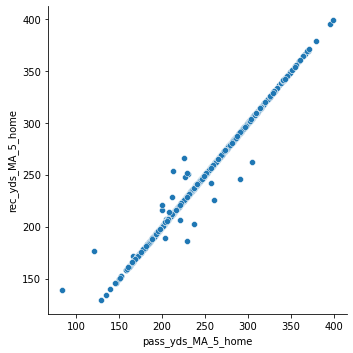

In [24]:
sns.relplot(x = 'pass_yds_MA_5_home', y = 'rec_yds_MA_5_home', data = df)

c:\Users\sylva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pass_yds_MA_5_away', ylabel='Density'>

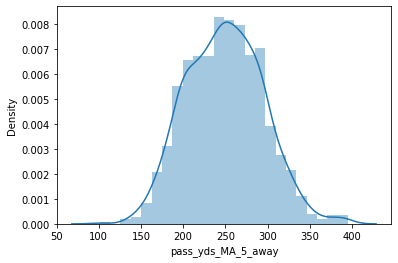

In [3]:
# Variable distribution
sns.distplot(df['pass_yds_MA_5_away'])

c:\Users\sylva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pass_td_MA_5_away', ylabel='Density'>

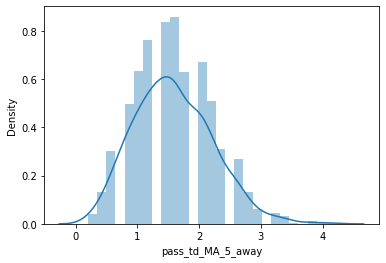

In [4]:
# Variable distribution
sns.distplot(df['pass_td_MA_5_away'])

In [25]:
select_features = [ 'awayteam', 'hometeam', 'winner_home', 'humidity', 'streak_away',
                    'pass_yds_MA_5_away', 'pass_td_MA_5_away', 'rush_yds_MA_5_away','rush_td_MA_5_away',
                     'kicks_return_yds_MA_5_away', 'punt_return_yds_MA_5_away', 'kicking_pts_MA_5_away',
                    'streak_home', 
                    'pass_yds_MA_5_home', 'pass_td_MA_5_home', 'rush_yds_MA_5_home', 'rush_td_MA_5_home', 
                     'kicks_return_yds_MA_5_home', 'punt_return_yds_MA_5_home', 'kicking_pts_MA_5_home',
                    'people']

In [26]:
corr = df.loc[:,select_features].corr()

<AxesSubplot:>

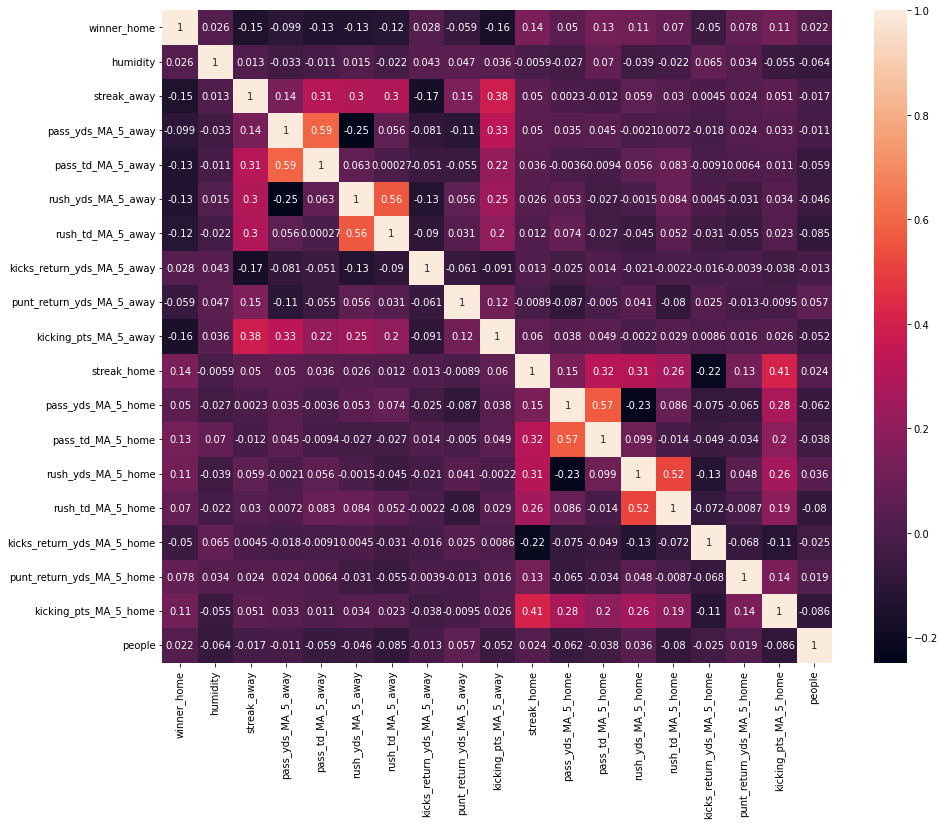

In [27]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True, ax=ax)

In [28]:
corr['winner_home'].abs().sort_values(ascending = False)

winner_home                   1.000000
kicking_pts_MA_5_away         0.163664
streak_away                   0.147534
streak_home                   0.139762
pass_td_MA_5_away             0.132679
rush_yds_MA_5_away            0.131809
pass_td_MA_5_home             0.126799
rush_td_MA_5_away             0.119218
rush_yds_MA_5_home            0.112884
kicking_pts_MA_5_home         0.108211
pass_yds_MA_5_away            0.099037
punt_return_yds_MA_5_home     0.077718
rush_td_MA_5_home             0.069841
punt_return_yds_MA_5_away     0.058706
kicks_return_yds_MA_5_home    0.050301
pass_yds_MA_5_home            0.049629
kicks_return_yds_MA_5_away    0.028216
humidity                      0.025809
people                        0.021992
Name: winner_home, dtype: float64

In [36]:
corr_win = corr['winner_home'].abs().sort_values(ascending = False)

In [37]:
corr_win= corr_win[1:]

<AxesSubplot:>

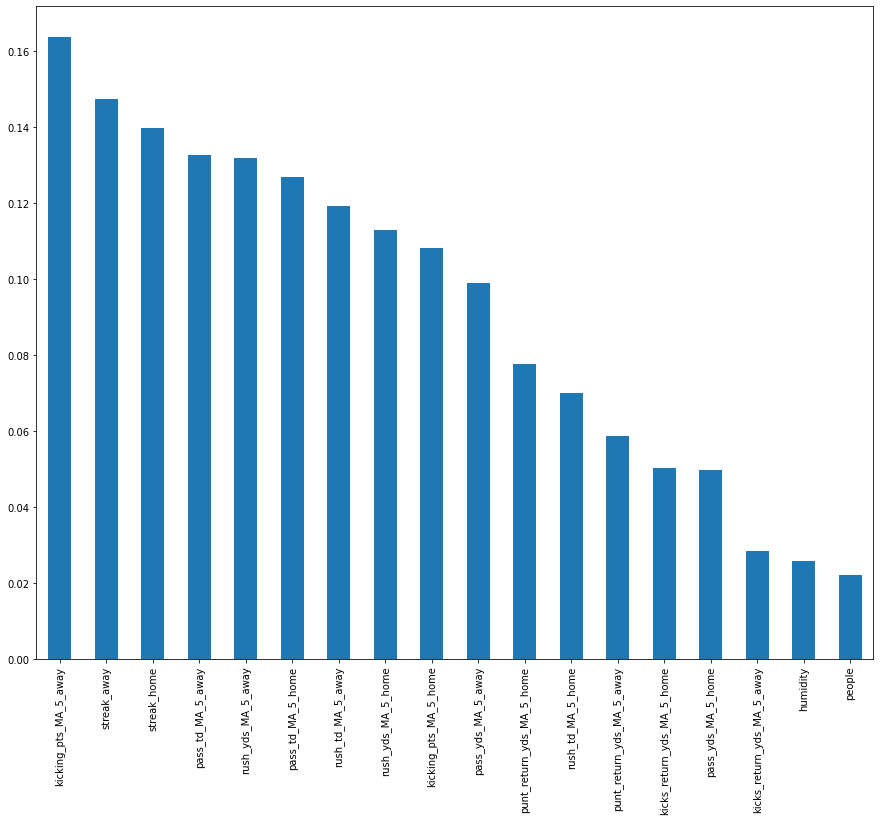

In [54]:
f, ax = plt.subplots(figsize=(15, 12))
corr_win.plot.bar(x = corr_win.index, y = corr_win.values)

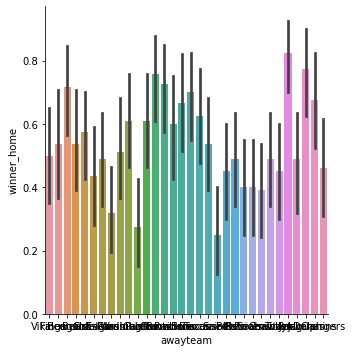

In [57]:
sns.catplot(x = "awayteam", y = "winner_home", data = df, kind = "bar")

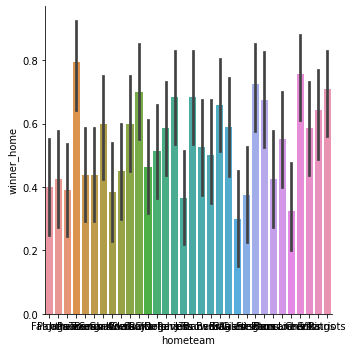

In [58]:
sns.catplot(x = "hometeam", y = "winner_home", data = df, kind = "bar")

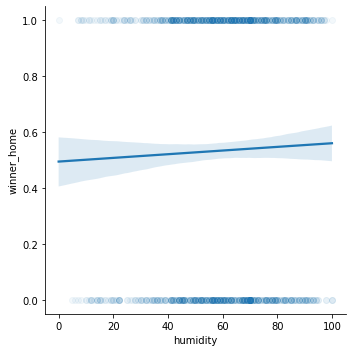

In [59]:
sns.lmplot(x = 'humidity', y = 'winner_home', data = df, logistic = True, scatter_kws={"alpha":.05})

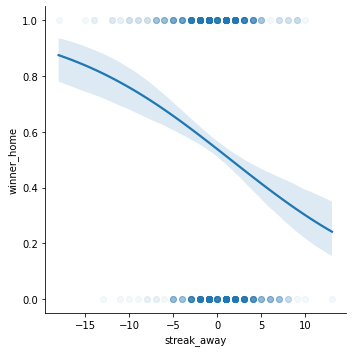

In [5]:
sns.lmplot(x = 'streak_away', y = 'winner_home', data = df, logistic = True, scatter_kws={"alpha":.05})

c:\Users\sylva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='streak_away', ylabel='Density'>

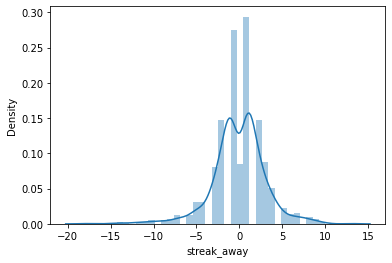

In [7]:
# Variable distribution
sns.distplot(df['streak_away'])

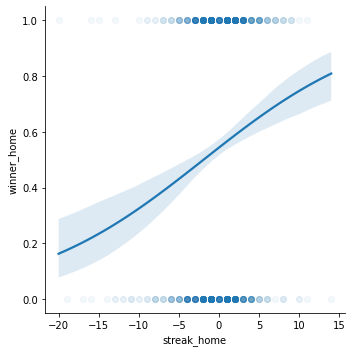

In [6]:
sns.lmplot(x = 'streak_home', y = 'winner_home', data = df, logistic = True, scatter_kws={"alpha":.05})

c:\Users\sylva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='streak_home', ylabel='Density'>

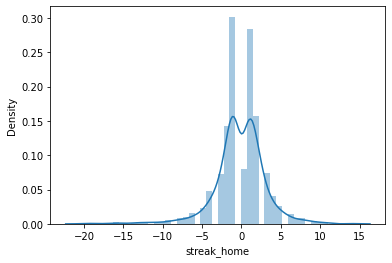

In [8]:
# Variable distribution
sns.distplot(df['streak_home'])

In [60]:
select_features = corr_win[:6]
select_features = select_features.index
select_features

Index(['kicking_pts_MA_5_away', 'streak_away', 'streak_home',
       'pass_td_MA_5_away', 'rush_yds_MA_5_away', 'pass_td_MA_5_home'],
      dtype='object')

In [61]:
import pandas as pd
import os


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)

In [63]:
df = pd.read_csv("../../04_datasets/nfl_dataset_vf.csv", index_col=0)
df.head()

,season,week,awayteam,hometeam,idgame,winner_home,home_coach,away_coach,weather_type,temperature,...,punt_return_yds_MA_5_home,kicking_pts_MA_5_home,delta_day_away,delta_day_home,stade,location,people,month,dayofmonth,dayofweek
0,2017,13,Vikings,Falcons,400951677,0,Dan Quinn,Mike Zimmer,NaN,NaN,...,10.4,9.4,10.0,7.0,Mercedes-Benz Stadium,"Atlanta, GA",95.0,12,3,6
1,2017,9,Falcons,Panthers,400951749,1,Ron Rivera,Dan Quinn,cloudy,61.0,...,22.4,7.4,7.0,7.0,Bank of America Stadium,"Charlotte, NC",100.0,11,5,6
2,2017,9,Bengals,Jaguars,400951753,1,Doug Marrone,Marvin Lewis,NaN,78.0,...,0.4,8.4,7.0,14.0,TIAA Bank Field,"Jacksonville, FL",89.0,11,5,6
3,2017,4,Bears,Packers,400951678,1,Mike McCarthy,John Fox,cloudy,65.0,...,NaN,NaN,4.0,4.0,Lambeau Field,"Green Bay, WI",97.0,9,29,4
4,2017,9,Colts,Texans,400951751,0,Bill O'Brien,Chuck Pagano,cloudy,84.0,...,31.4,9.0,7.0,6.0,NRG Stadium,"Houston, TX",100.0,11,5,6


In [64]:
Y = df.loc[:,"winner_home"]
X = df.loc[:,select_features]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)

# select automatically the numerical and categorical columns
num_col = X.select_dtypes([np.number]).columns
cat_col = X.select_dtypes("object").columns

# Create pipeline for numeric features
numeric_features = X.select_dtypes([np.number]).columns 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())])

# Create pipeline for categorical features
categorical_features = X.select_dtypes("object").columns 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [65]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.6062075654704171
Accuracy on test set :  0.6162790697674418


In [70]:
scores = cross_val_score(model,X_train, Y_train, cv=10)
avg = scores.mean()
std = scores.std()
print('Cross-validated accuracy : {}\nstandard deviation : {}'.format(avg, std))

Cross-validated accuracy : 0.5965365944734876
standard deviation : 0.0392725578292218


In [66]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

Y_train_pred = model_rf.predict(X_train)
Y_test_pred = model_rf.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.9786614936954413
Accuracy on test set :  0.5775193798449613


In [67]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

Y_train_pred = model_xgb.predict(X_train)
Y_test_pred = model_xgb.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.9699321047526673
Accuracy on test set :  0.5426356589147286


In [68]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6], # exactly the same role as in scikit-learn
    'min_child_weight': [1, 2, 3], # effect is more or less similar to min_samples_leaf and min_samples_split
    'n_estimators': [10, 12, 14, 16, 18, 20] # exactly the same role as in scikit-learn
}
print(params)
gridsearch = GridSearchCV(xgboost, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'max_depth': [2, 4, 6], 'min_child_weight': [1, 2, 3], 'n_estimators': [10, 12, 14, 16, 18, 20]}
...Done.
Best hyperparameters :  {'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 10}
Best validation accuracy :  0.6003570863561372

Accuracy on training set :  0.6430649854510184
Accuracy on test set :  0.6046511627906976


In [83]:
select_features = ['temperature', 'humidity', 'wind', 'people', 'dayofmonth', 'dayofweek', 'streak_away', 'streak_home',
'awayteam', 'hometeam', 'home_coach', 'away_coach', 'weather_type', 'stade', 'kicking_pts_MA_5_away', 'kicking_pts_MA_5_home']

In [84]:
Y = df.loc[:,"winner_home"]
X = df.loc[:,select_features]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)

# select automatically the numerical and categorical columns
num_col = X.select_dtypes([np.number]).columns
cat_col = X.select_dtypes("object").columns

# Create pipeline for numeric features
numeric_features = X.select_dtypes([np.number]).columns 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())])

# Create pipeline for categorical features
categorical_features = X.select_dtypes("object").columns 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

c:\Users\sylva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [85]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.7109602327837051
Accuracy on test set :  0.6317829457364341


In [86]:
scores = cross_val_score(model,X_train, Y_train, cv=10)
avg = scores.mean()
std = scores.std()
print('Cross-validated accuracy : {}\nstandard deviation : {}'.format(avg, std))

Cross-validated accuracy : 0.616868932038835
standard deviation : 0.0374764276935566


In [87]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

Y_train_pred = model_xgb.predict(X_train)
Y_test_pred = model_xgb.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.9980601357904947
Accuracy on test set :  0.5658914728682171


In [88]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6], # exactly the same role as in scikit-learn
    'min_child_weight': [1, 2, 3, 4, 5], # effect is more or less similar to min_samples_leaf and min_samples_split
    'n_estimators': [ 16, 18, 20, 22, 24] # exactly the same role as in scikit-learn
}
print(params)
gridsearch = GridSearchCV(xgboost, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'max_depth': [2, 4, 6], 'min_child_weight': [1, 2, 3, 4, 5], 'n_estimators': [16, 18, 20, 22, 24]}
...Done.
Best hyperparameters :  {'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 24}
Best validation accuracy :  0.5819462336429589

Accuracy on training set :  0.6935014548981572
Accuracy on test set :  0.5968992248062015


In [9]:
select_features = ['streak_away', 'streak_home',
'awayteam', 'hometeam']

In [10]:
Y = df.loc[:,"winner_home"]
X = df.loc[:,select_features]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)

# select automatically the numerical and categorical columns
num_col = X.select_dtypes([np.number]).columns
cat_col = X.select_dtypes("object").columns

# Create pipeline for numeric features
numeric_features = X.select_dtypes([np.number]).columns 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())])

# Create pipeline for categorical features
categorical_features = X.select_dtypes("object").columns 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [11]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.6847720659553831
Accuracy on test set :  0.6046511627906976


In [12]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

Y_train_pred = model_xgb.predict(X_train)
Y_test_pred = model_xgb.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.8603297769156159
Accuracy on test set :  0.5736434108527132


In [14]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6], # exactly the same role as in scikit-learn
    'min_child_weight': [1, 2, 3, 4, 5], # effect is more or less similar to min_samples_leaf and min_samples_split
    'n_estimators': [ 4, 10, 16, 18, 20, 22, 24] # exactly the same role as in scikit-learn
}
print(params)
gridsearch = GridSearchCV(xgboost, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'max_depth': [2, 4, 6], 'min_child_weight': [1, 2, 3, 4, 5], 'n_estimators': [4, 10, 16, 18, 20, 22, 24]}
...Done.
Best hyperparameters :  {'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 22}
Best validation accuracy :  0.6227201844192827

Accuracy on training set :  0.6925315227934045
Accuracy on test set :  0.5736434108527132
